In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas_datareader import data,wb
%matplotlib inline

# Data
We need to get data using pandas_datareader. We will get stock information for the following banks:

* Bank of America
* CiliGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Figure out how to get the stock data from jan 1st 2006 to jan 2016 for each of these banks. Set each nl to be separated data frame, with the variable name for the bank being its ticker symbol. this will involve a few steps.

1. Use datetime to set start and end datetime objects
2. Figure out the thicker symbol for each unit
3. Figure out how to use datareader to grab info on the stock



In [5]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

# 1 Creating the Bank objects

In [6]:
BAC=data.DataReader('BAC','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'
# CitiGroup
Citi=data.DataReader('C','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'
# Goldman Sachs
GS=data.DataReader('GS','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'
# Morgan Stanley
MS=data.DataReader('MS','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'
# Wells Fargo
WFC=data.DataReader('WFC','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'
#JPMorgan Chase
JPM=data.DataReader('JPM','yahoo',start,end).drop(axis=1,labels='Adj Close') # this is to delete the column name 'Adj Close'


In [7]:
MS.head(3)

,High,Low,Open,Close,Volume
Date,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0


# 2 Create a single list with all the banks in it, to have a multilevel index

In [225]:
tickers=['BAC','CITI','GS','JPM','MS','WFC']
bs=pd.concat([BAC,Citi,GS,JPM,MS,WFC],axis=1,keys=tickers)
bs.columns.names=['Bank Ticker','Stock Info']
bs.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker        CITI                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0   

Bank Ticker     ...             MS                                   \
Stock Info      ...           High        Low       Open      Close   
Date            ...                                                   
2006-01-03      ...      58.490002  56.740002  57.169998  58.310001   
2006-01-04      ...      59.279999  58.349998  58.700001  58.349998   
2006-01-05      ...      58.590000  58.020000  58.549999  58.509998   

Bank Ticker                WFC                                               
Stock Info      Volume    High        Low       Open      Close      Volume  
Date                                                                         
2006-01-03   5377000.0  31.975  31.195000  31.600000  31.900000  11016400.0  
2006-01-04   7977800.0  31.820  31.365000  31.799999  31.530001  10870000.0  
2006-01-05   5778000.0  31.555  31.309999  31.500000  31.495001  10158000.0  

[3 rows x 30 columns]

# 3 Exploratory Data Analysis
what  is the max and the close price for each bank's stock throughout the time period?

In [9]:
print(bs['BAC']['Close'].max())
print(bs['CITI']['Close'].max())
print(bs['JPM']['Close'].max())
print(bs['MS']['Close'].max())
print(bs['WFC']['Close'].max())
print(bs['MS']['Close'].max())
print("")
# or 
for tick in tickers:
    print(f"{tick}: {bs[tick]['Close'].max()}")
# or 
bs.xs(key='Close',axis=1,level='Stock Info').max()

54.900001525878906
564.0999755859375
70.08000183105469
89.30000305175781
58.52000045776367
89.30000305175781

BAC: 54.900001525878906
CITI: 564.0999755859375
GS: 247.9199981689453
JPM: 70.08000183105469
MS: 89.30000305175781
WFC: 58.52000045776367


Bank Ticker
BAC      54.900002
CITI    564.099976
GS      247.919998
JPM      70.080002
MS       89.300003
WFC      58.520000
dtype: float64

# 3.1 
Create a new empty DataFrame called returns. this dataframe will contain the returns for each bank's stock. 



In [240]:
BIG={}
for tick in tickers:
    lista=[]
    for num in range(0,len(bs[tick]['Close'])):
        value=(bs[tick]['Close'][num])/((bs[tick]['Close'][num-1]))-1
        lista.append(value)
    BIG.update({tick+' Returns':lista})
        
returns=pd.DataFrame(BIG)
returns.head(5)
# or
returns=pd.DataFrame()
for tick in tickers:
    returns[tick+ 'Returns']=bs[tick]['Close'].pct_change()
returns.head(3)


,BACReturns,CITIReturns,GSReturns,JPMReturns,MSReturns,WFCReturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110


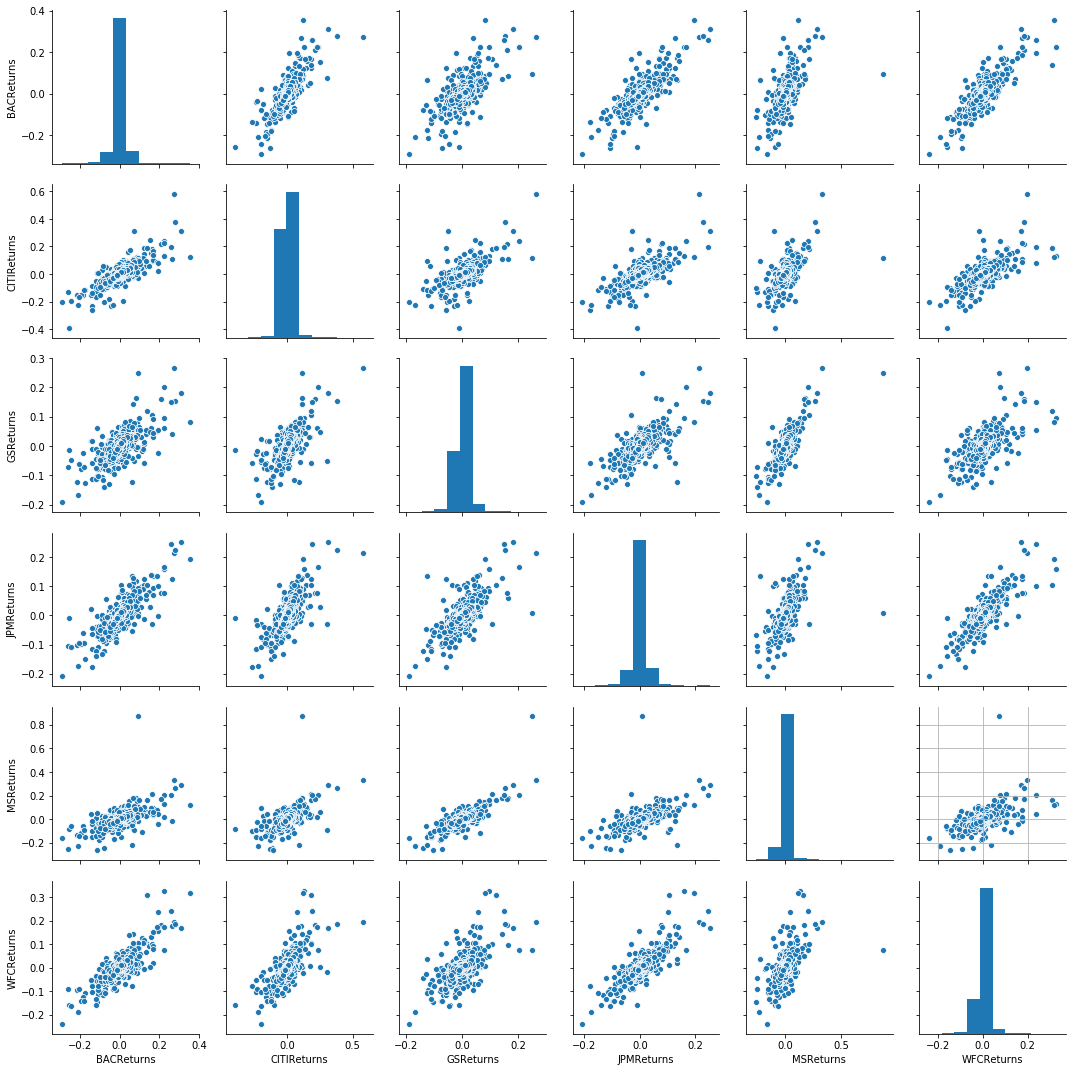

In [239]:
sns.pairplot(data=returns[1:])


Using this returns DataFrame, figure out on what dates each
bank stock had the best and worst single day returns. you 
should notice that 4 of the banks share the same day for the
worst drop, did anything significant happend that day

In [90]:
lista_min=[]
fecha_min=[]
columns=list(returns)
for i in columns:
    lista_min.append(returns[i].min())
    for num in range(1,len(returns[i])):
        if returns[i][num]==returns[i].min():
            fecha_min.append(returns.index[num])
    
final=pd.DataFrame({'Empresa':columns,'Fecha':fecha_min,'Close Min':lista_min})
print(final.set_index('Empresa'))
print("")
print(returns.idxmin())

# or Just using a built-in function


        

                 Fecha  Close Min
Empresa                          
BACReturns  2009-01-20  -0.289694
CITIReturns 2009-02-27  -0.390244
GSReturns   2009-01-20  -0.189596
JPMReturns  2009-01-20  -0.207274
MSReturns   2008-10-09  -0.258929
WFCReturns  2009-01-20  -0.238223

BACReturns    2009-01-20
CITIReturns   2009-02-27
GSReturns     2009-01-20
JPMReturns    2009-01-20
MSReturns     2008-10-09
WFCReturns    2009-01-20
dtype: datetime64[ns]


Take a look at the standart deviation of the returns, which 
stock would you classify as the riskier over the entire time 
period? Which would you classify as the riskiest for the yead 
2015

In [132]:
returns.std()

BACReturns     0.036647
CITIReturns    0.038672
GSReturns      0.025390
JPMReturns     0.027667
MSReturns      0.037819
WFCReturns     0.030238
dtype: float64

In [157]:
returns.ix['2015-01-01':'2015-12-31'].std()

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BACReturns     0.016163
CITIReturns    0.015289
GSReturns      0.014046
JPMReturns     0.014017
MSReturns      0.016249
WFCReturns     0.012591
dtype: float64

Create a distplot using seaborn of of the total time span and the 2015 returns for Morgan Stanley

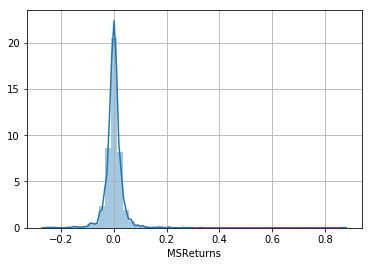

In [235]:
sns.distplot(returns['MSReturns'][1:])
plt.grid(True)

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



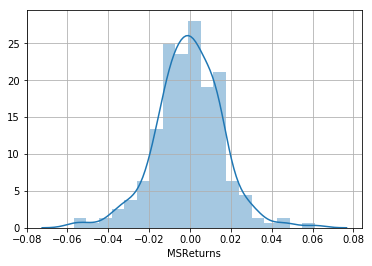

In [236]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MSReturns'])
plt.grid(True)

 Create a distplot using seaborn of the 2008 returns of CITIGrouop

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



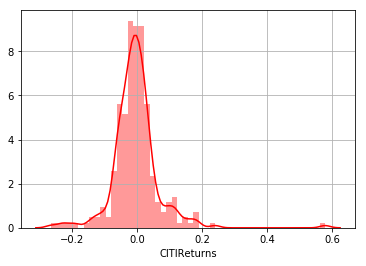

In [234]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CITIReturns'],color='red',bins=50)
plt.grid(True)

# More Visualization


In [174]:
import plotly
import cufflinks as cf
cf.go_offline()

Create a line plot showing close price for each bank for the entireindex of time 

In [265]:
#for tick in tickers:
#    bs[tick]['Close'].plot(label=tick)
#    plt.grid(True)
#    
# or
bs.xs(key='Close',axis=1,level='Stock Info').iplot()


Create a hetmap of the correlation between the 
stocks close price

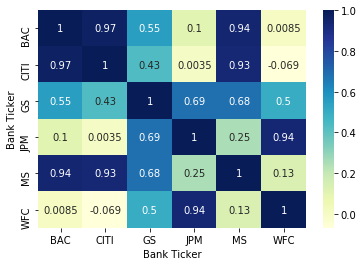

In [288]:
b=bs.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(b,cmap="YlGnBu",annot=True)